In [2]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the dataset
file_path = '/content/greendestination (1) (2).csv'
df = pd.read_csv(file_path)

# Display first 5 rows
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [12]:
# Step 3: Basic Information and EDA
df.info()
df.describe()
df.columns
df.shape
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [5]:
#Step 4: Clean the data
# Example cleaning steps (customize as per actual data)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Fill or drop nulls
df = df.dropna()

# Convert column types if needed
# df['Price'] = df['Price'].replace('$','', regex=True).astype(float)

# Check cleaned data
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
#Step 5: Univariate Analysis

# Plot Category distribution
plt.figure(figsize=(10,5))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('App Count by Category')
plt.show()

# Plot Rating distribution
plt.figure(figsize=(6,4))
sns.histplot(df['Rating'], bins=20, kde=True)
plt.title('Distribution of App Ratings')
plt.show()


KeyError: 'Category'

<Figure size 1000x500 with 0 Axes>

In [8]:
#Step 6: Bivariate Analysis

# Ratings vs Installs (if column exists)
if 'Installs' in df.columns:
    df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)
    sns.scatterplot(x='Installs', y='Rating', data=df)
    plt.xscale('log')
    plt.title('Rating vs Installs')
    plt.show()

# Price vs Rating (if applicable)
if 'Price' in df.columns:
    df['Price'] = df['Price'].replace('$','', regex=True).astype(float)
    sns.boxplot(x='Price', y='Rating', data=df)
    plt.title('Rating by App Price')
    plt.show()


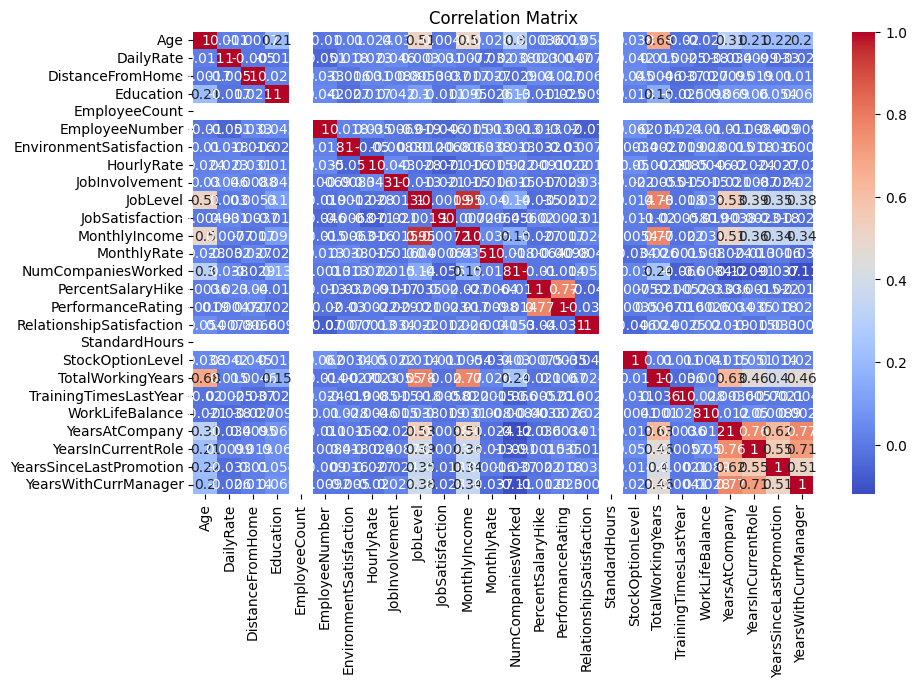

In [10]:
#Step 7: Correlation heatmap (for numeric columns)
numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(10,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
#Step 8: Feature Engineering (Optional)
# Example: Extract content rating category or type of app

# df['Is_Free'] = df['Price'] == 0
# df['App_Length'] = df['App'].apply(lambda x: len(str(x)))

# df.head()
